<a href="https://colab.research.google.com/github/1997shub/Data-Prediction/blob/main/data_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#EDA
from ydata_profiling import ProfileReport
#data splitting
from sklearn.model_selection import train_test_split
#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#Data Modeling
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**DATA** **IMPORTING**

In [6]:
# Data Import
data = pd.read_csv("palmertech short.csv")
data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


**DATA** **CLEANING**

In [9]:
# Null Value Counting
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                981
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1678
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
# Null Data Dropping
data1 = data.dropna()

In [12]:
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [13]:
#Checking For Null Values
data1.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

**DATA ANALYSIS**

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19409 entries, 0 to 21898
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           19409 non-null  int64  
 1   department            19409 non-null  object 
 2   region                19409 non-null  object 
 3   education             19409 non-null  object 
 4   gender                19409 non-null  object 
 5   recruitment_channel   19409 non-null  object 
 6   no_of_trainings       19409 non-null  int64  
 7   age                   19409 non-null  int64  
 8   previous_year_rating  19409 non-null  float64
 9   length_of_service     19409 non-null  int64  
 10  KPIs_met >80%         19409 non-null  int64  
 11  awards_won?           19409 non-null  int64  
 12  avg_training_score    19409 non-null  int64  
 13  is_promoted           19409 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.2+ MB


In [15]:
#Statistical Analysis
data1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000
mean,38962.507909,1.253027,35.607965,3.343861,6.329899,0.355814,0.022979,63.665207,0.085682
std,22623.740584,0.602977,7.556561,1.255554,4.237638,0.478772,0.149840,13.321123,0.279901
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19284.000000,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,38929.000000,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58526.000000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [16]:
#Exploratory Data Analysis
from pandas_profiling import ProfileReport
design_report = ProfileReport(data1)
design_report

<ipython-input-16-6c24eb894056>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
data1.shape

(19409, 14)

**LABEL ENCODING**

In [19]:
# Changing  Object Into Numeric Form
le = LabelEncoder()
data2 = data1.apply(le.fit_transform)
data2.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,16264,7,31,2,0,2,0,15,4,7,1,0,10,0
1,16196,4,14,0,1,0,0,10,4,3,0,0,21,0
2,1909,7,10,0,1,2,0,14,2,6,0,0,11,0
3,634,7,15,0,1,0,1,19,0,9,0,0,11,0
4,12197,8,18,0,1,0,0,25,2,1,0,0,34,0


In [20]:
# Data imbalance check
target_value = data2["is_promoted"].value_counts()/len(data2)
target_value

0    0.914318
1    0.085682
Name: is_promoted, dtype: float64

In [21]:
#splitting the data
x = data2.drop(columns="is_promoted",axis=1)
y = data2["is_promoted"]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 50,test_size = .2)

In [22]:
# data balancing treatment
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smot,y_smot = oversample.fit_resample(x,y)

In [23]:
# Final Shape
print(x_smot.shape)
print(y_smot.shape)
print(x_train.shape)
print(y_train.shape)
print(x.shape)
print(y.shape)

(35492, 13)
(35492,)
(15527, 13)
(15527,)
(19409, 13)
(19409,)


In [24]:
# resplitting
X = x_smot
Y = y_smot
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=15,test_size=.2)

In [25]:
# Counting data
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 14223, 1: 1304})

In [26]:
#Scaling Data
ss =StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**DIFFERENT MODEL APPLY**

In [27]:
#model 1 = Logistic Regression
lr = LogisticRegression(C=0.1)
model = lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test,lr_pred)
lr_acc_score = accuracy_score(Y_test,lr_pred)
print("confusion_matrix:")
print(lr_conf_matrix)
print("Accuracy of Logistic Regression:",lr_acc_score*100,"\n")
print("Classification Report:","\n",classification_report(Y_test,lr_pred))

confusion_matrix:
[[2415 1100]
 [1051 2533]]
Accuracy of Logistic Regression: 69.69995774052683 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69      3515
           1       0.70      0.71      0.70      3584

    accuracy                           0.70      7099
   macro avg       0.70      0.70      0.70      7099
weighted avg       0.70      0.70      0.70      7099



In [28]:
#model 2 = Naive Bayes
nb = GaussianNB()
nb.fit(X_train,Y_train)
nb_pred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(Y_test,nb_pred)
nb_acc_score = accuracy_score(Y_test,nb_pred)
print("confusion_matrix:","\n",nb_conf_matrix)
print("Accuracy of Navive Bayes model:",nb_acc_score*100)
print("Classification Report:","\n",classification_report(Y_test,nb_pred))

confusion_matrix: 
 [[2127 1388]
 [ 674 2910]]
Accuracy of Navive Bayes model: 70.9536554444288
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.61      0.67      3515
           1       0.68      0.81      0.74      3584

    accuracy                           0.71      7099
   macro avg       0.72      0.71      0.71      7099
weighted avg       0.72      0.71      0.71      7099



In [29]:
# model 3 = Random Forest Classifier
rf = RandomForestClassifier(n_estimators=11,random_state=10,max_depth=29)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test,rf_pred)
rf_acc_score = accuracy_score(Y_test,rf_pred)
print("Confusion Matrix:","\n",rf_conf_matrix)
print("Accuracy Score of model:",rf_acc_score*100)
print("Classification Report:","\n",classification_report(Y_test,rf_pred))

Confusion Matrix: 
 [[3224  291]
 [ 346 3238]]
Accuracy Score of model: 91.0269051979152
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      3515
           1       0.92      0.90      0.91      3584

    accuracy                           0.91      7099
   macro avg       0.91      0.91      0.91      7099
weighted avg       0.91      0.91      0.91      7099



In [30]:
#Model 4  = K-NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(Y_test,knn_pred)
knn_acc_score = accuracy_score(Y_test,knn_pred)
print("ConfusionMatrix:","\n",knn_conf_matrix)
print("Accuracy_score of knn model:",knn_acc_score*100)
print("Classification Report:","\n",classification_report(Y_test,knn_pred))

ConfusionMatrix: 
 [[2911  604]
 [ 301 3283]]
Accuracy_score of knn model: 87.25172559515426
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      3515
           1       0.84      0.92      0.88      3584

    accuracy                           0.87      7099
   macro avg       0.88      0.87      0.87      7099
weighted avg       0.88      0.87      0.87      7099



In [31]:
#model 5 = Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test,dt_pred)
dt_acc_score = accuracy_score(Y_test,dt_pred)
print("Confusion matrix:","\n",dt_conf_matrix)
print("Accurecy score of dt model:",dt_acc_score*100)
print("Classification Report:","\n",classification_report(Y_test,dt_pred))

Confusion matrix: 
 [[2950  565]
 [ 410 3174]]
Accurecy score of dt model: 86.26567122129877
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      3515
           1       0.85      0.89      0.87      3584

    accuracy                           0.86      7099
   macro avg       0.86      0.86      0.86      7099
weighted avg       0.86      0.86      0.86      7099



In [32]:
# model 6 = Support vector machine
svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svc.fit(X_train,Y_train)
svc_pred = svc.predict(X_test)
svc_conf_matrix =confusion_matrix(Y_test,svc_pred)
svc_acc_score = accuracy_score(Y_test,svc_pred)
print("Confusion matrix:","\n",svc_conf_matrix)
print("Acccuracy score of svc model:",svc_acc_score*100)
print("Classification report:","\n",classification_report(Y_test,svc_pred))

Confusion matrix: 
 [[2348 1167]
 [ 968 2616]]
Acccuracy score of svc model: 69.92534159740809
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.67      0.69      3515
           1       0.69      0.73      0.71      3584

    accuracy                           0.70      7099
   macro avg       0.70      0.70      0.70      7099
weighted avg       0.70      0.70      0.70      7099



In [72]:
# Extreme Boost Gradient
import xgboost as xgb
xb = xgb.XGBClassifier(n_estimators=1000, max_depth = 50, learning_rate = 0.52)
xb.fit(X_train,Y_train)
xgb_pred = xb.predict(X_test)
xgb_conf_matrix = confusion_matrix(Y_test,xgb_pred)
xgb_acc_score = accuracy_score(Y_test,xgb_pred)
print("Confusion matrix: \n",xgb_conf_matrix)
print("Accuracy_score:",xgb_acc_score*100)
print("Classifier report:\n",classification_report(Y_test,xgb_pred))

Confusion matrix: 
 [[3343  172]
 [ 211 3373]]
Accuracy_score: 94.60487392590505
Classifier report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      3515
           1       0.95      0.94      0.95      3584

    accuracy                           0.95      7099
   macro avg       0.95      0.95      0.95      7099
weighted avg       0.95      0.95      0.95      7099



**ACCURACY COMPARE**

In [74]:
model_ev =pd.DataFrame({"models":["Logistic regression","Naive Bayes","Random Tree Forest",
                                "K-Nearest Neighbor", "Decision Tree","Support Vector Machine","XGBoost Classifier"],
                        "Accuracy":[lr_acc_score*100,nb_acc_score*100,rf_acc_score*100,
                                     knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,xgb_acc_score*100]})
display(model_ev)

,models,Accuracy
0,Logistic regression,69.699958
1,Naive Bayes,70.953655
2,Random Tree Forest,91.026905
3,K-Nearest Neighbor,87.251726
4,Decision Tree,86.265671
5,Support Vector Machine,69.925342
6,XGBoost Classifier,94.604874


**SAVE MODEL**

In [ ]:
#Save the XGBoost model
import pickle
xb_pkl_filename = 'xgboost_model.pkl'
xb_Model_pkl = open(xb_pkl_filename, 'wb')
pickle.dump(xb, xb_Model_pkl)
xb_Model_pkl.close()

**receiver operating characteristic curve**

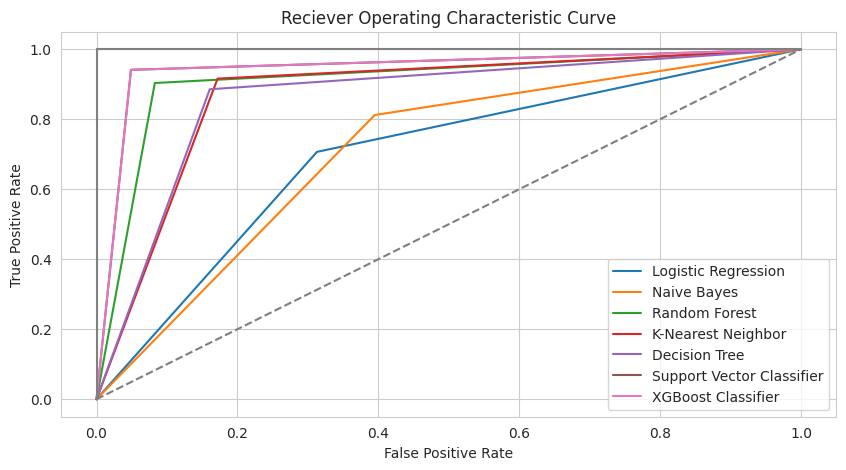

In [76]:
import matplotlib
lr_false_positive_rate,lr_true_negative_rate,lr_threshold = roc_curve(Y_test,lr_pred)
nb_false_positive_rate,nb_true_negative_rate,nb_threshold = roc_curve(Y_test,nb_pred)
rf_false_positive_rate,rf_true_nagative_rate,rf_threshold = roc_curve(Y_test,rf_pred)
knn_false_positive_rate,knn_true_negative_rate,knn_threshold = roc_curve(Y_test,knn_pred)
dt_false_positive_rate,dt_true_nagative_rate,dt_threshold = roc_curve(Y_test,dt_pred)
svc_false_positive_rate,svc_true_negative_rate,svc_threshold = roc_curve(Y_test,svc_pred)
svc_false_positive_rate,svc_true_negative_rate,svc_threshold = roc_curve(Y_test,xgb_pred)

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title("Reciever Operating Characteristic Curve")
plt.plot(lr_false_positive_rate,lr_true_negative_rate,label="Logistic Regression")
plt.plot(nb_false_positive_rate,nb_true_negative_rate,label="Naive Bayes")
plt.plot(rf_false_positive_rate,rf_true_nagative_rate,label="Random Forest")
plt.plot(knn_false_positive_rate,knn_true_negative_rate,label="K-Nearest Neighbor")
plt.plot(dt_false_positive_rate,dt_true_nagative_rate,label="Decision Tree")
plt.plot(svc_false_positive_rate,svc_true_negative_rate,label="Support Vector Classifier")
plt.plot(svc_false_positive_rate,svc_true_negative_rate,label="XGBoost Classifier")

plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".5")
plt.plot([1,1],c='.5')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()

**TESTING MODEL**

In [77]:
data3 = np.array([[12213,7,31,0,0,2,0,15,4,2,1,0,11]])
prediction = xb.predict(data3)
print(prediction)

[1]


In [78]:
data3 = np.array([[14504,7,20,0,1,2,0,13,4,5,1,0,12]])
prediction = xb.predict(data3)
print(prediction)

[1]


In [79]:
data3 = np.array([[12197,8,18,0,1,0,0,25,2,1,0,0,34]])
prediction = xb.predict(data3)
print(prediction)

[1]
